In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk")
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data=pd.read_csv("emotion.data")

In [3]:
data

,Unnamed: 0,text,emotions
0,27383,i feel awful about it too because it s my job ...,sadness
1,110083,im alone i feel awful,sadness
2,140764,ive probably mentioned this before but i reall...,joy
3,100071,i was feeling a little low few days back,sadness
4,2837,i beleive that i am much more sensitive to oth...,love
...,...,...,...
416804,566,that was what i felt when i was finally accept...,joy
416805,36236,i take every day as it comes i m just focussin...,fear
416806,76229,i just suddenly feel that everything was fake,sadness
416807,131640,im feeling more eager than ever to claw back w...,joy


In [4]:
data.head()

,Unnamed: 0,text,emotions
0,27383,i feel awful about it too because it s my job ...,sadness
1,110083,im alone i feel awful,sadness
2,140764,ive probably mentioned this before but i reall...,joy
3,100071,i was feeling a little low few days back,sadness
4,2837,i beleive that i am much more sensitive to oth...,love


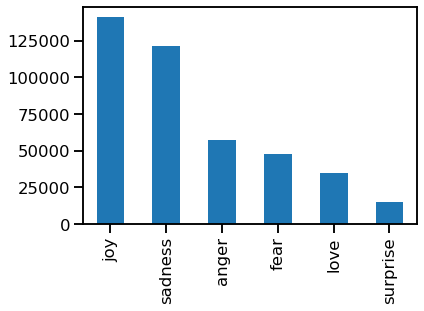

In [5]:
data['emotions'].value_counts().plot.bar()
plt.show()

In [6]:
data = data.drop(['Unnamed: 0'], axis=1)
X = data['text']
y = data['emotions']

In [7]:
X

0         i feel awful about it too because it s my job ...
1                                     im alone i feel awful
2         ive probably mentioned this before but i reall...
3                  i was feeling a little low few days back
4         i beleive that i am much more sensitive to oth...
                                ...                        
416804    that was what i felt when i was finally accept...
416805    i take every day as it comes i m just focussin...
416806        i just suddenly feel that everything was fake
416807    im feeling more eager than ever to claw back w...
416808    i give you plenty of attention even when i fee...
Name: text, Length: 416809, dtype: object

In [9]:
y

0         sadness
1         sadness
2             joy
3         sadness
4            love
           ...   
416804        joy
416805       fear
416806    sadness
416807        joy
416808    sadness
Name: emotions, Length: 416809, dtype: object

In [25]:
X_train,X_test,ytrain,ytest=train_test_split(X,y,test_size=0.10,random_state=42)

In [26]:
X_train

380657    i feel strongly about and i am convinced it is...
363775    i feel like sistas are looking for perfection ...
42951                           i feel like a proud grandma
99105     i couldn t help but start smiling and feeling ...
100297    i feel that i can answer in a completely un sa...
                                ...                        
259178    i feel like telling these horny devils to find...
365838    i began to realize that when i was feeling agi...
131932    i feel very curious be why previous early dawn...
146867    i feel that becuase of the tyranical nature of...
121958    i think that after i had spent some time inves...
Name: text, Length: 375128, dtype: object

In [27]:
X_test

36130         i just feel really helpless and heavy hearted
138065    ive enjoyed being able to slouch about relax a...
146440    i gave up my internship with the dmrg and am f...
103337                           i dont know i feel so lost
315528    i am a kindergarten teacher and i am thoroughl...
                                ...                        
332972    i feel triumphant and defeated all at oncecale...
60779                                i actually feel abused
44277     i don t feel sorrow for the town or even yell ...
228806    i call it mourning because i feel like i have ...
86769     i feel theres not a lot of time or explanation...
Name: text, Length: 41681, dtype: object

In [28]:
ytrain

380657         joy
363775         joy
42951          joy
99105          joy
100297       anger
            ...   
259178        love
365838       anger
131932    surprise
146867       anger
121958    surprise
Name: emotions, Length: 375128, dtype: object

In [38]:
ytest

36130        fear
138065    sadness
146440       fear
103337    sadness
315528       fear
           ...   
332972        joy
60779     sadness
44277     sadness
228806    sadness
86769        love
Name: emotions, Length: 41681, dtype: object

In [30]:
vectorizer = TfidfVectorizer( max_df= 0.9).fit(X_train)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
print(X_train.shape)

(375128, 71553)


In [33]:
encoder = LabelEncoder().fit(ytrain)
y_train = encoder.transform(ytrain)
y_test = encoder.transform(ytest)

In [34]:
model = LogisticRegression(C=.1, class_weight='balanced')
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Training Accuracy : ", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy  : ", accuracy_score(y_test, y_pred_test))

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Accuracy :  0.8988105393359067
Testing Accuracy  :  0.895084091072671


In [37]:
def predict_(x, plot=False):
    tfidf = vectorizer.transform([x])
    preds = model.predict_proba(tfidf)[0]
    plt.figure(figsize=(8,4))
    sns.barplot(x= encoder.classes_, y=preds)
    plt.show()
    return preds